<a href="https://colab.research.google.com/github/sravanjosh07/Self_Driving_cars-Udemy/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import keras
import random
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dense


In [52]:
 np.random.seed(101)

In [53]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [55]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in the train set are not equal to the labels"
assert(X_train.shape[1:]==(28,28)),"The dimensions are not 28x28"
assert(X_test.shape[1:] == (28,28)), "the dimensions of test are not 28x28"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in the train set are not equal to the labels"

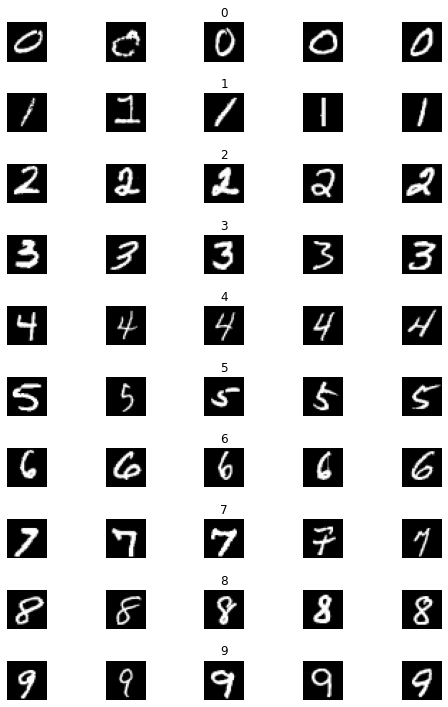

In [56]:
no_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols= cols, figsize = (7,10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :,:], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i ==2:
      axs[j][i].set_title(str(j))
      no_of_samples.append(len(x_selected))


In [57]:
print(no_of_samples) 

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


<BarContainer object of 10 artists>

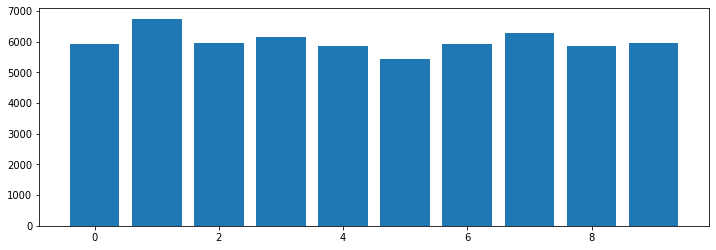

In [58]:
plt.figure(figsize= (12,4))
plt.bar(range(0, num_classes), no_of_samples)

In [59]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
X_train = X_train/255
X_test = X_test/255

In [60]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

In [61]:
def create_model():
  model = Sequential()
  model.add(Dense(10, activation= "relu", input_dim = num_pixels))
  model.add(Dense(10, activation= "relu"))
  model.add(Dense(num_classes, activation= "softmax" ))
  model.compile(Adam(learning_rate= 0.01), loss = "categorical_crossentropy", metrics = 'accuracy')
  return model

In [62]:
model = create_model()

In [63]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
h =model.fit(X_train, y_train, validation_split= 0.01, epochs= 15, verbose= 1, batch_size= 200, shuffle=1)

Epoch 1/15
297/297 [==============================] - 1s 3ms/step - loss: 0.9447 - accuracy: 0.6759 - val_loss: 0.2994 - val_accuracy: 0.9367
Epoch 2/15
297/297 [==============================] - 1s 2ms/step - loss: 0.2960 - accuracy: 0.9135 - val_loss: 0.2402 - val_accuracy: 0.9417
Epoch 3/15
297/297 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9211 - val_loss: 0.2383 - val_accuracy: 0.9400
Epoch 4/15
297/297 [==============================] - 1s 2ms/step - loss: 0.2437 - accuracy: 0.9293 - val_loss: 0.2545 - val_accuracy: 0.9417
Epoch 5/15
297/297 [==============================] - 1s 2ms/step - loss: 0.2374 - accuracy: 0.9295 - val_loss: 0.2710 - val_accuracy: 0.9383
Epoch 6/15
297/297 [==============================] - 1s 2ms/step - loss: 0.2328 - accuracy: 0.9331 - val_loss: 0.2514 - val_accuracy: 0.9467
Epoch 7/15
297/297 [==============================] - 1s 2ms/step - loss: 0.2302 - accuracy: 0.9309 - val_loss: 0.2612 - val_accuracy: 0.9350
Epoch 

Text(0.5, 0, 'Epochs')

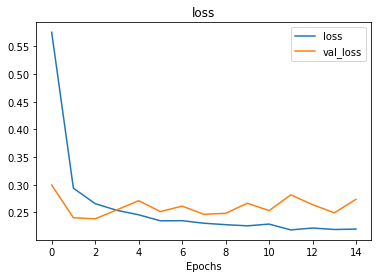

In [66]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

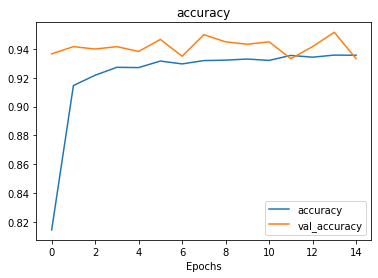

In [67]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')

In [69]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
print("the test score is:", score[0])
print('the accuracy is:', score[1])

[0.25138676166534424, 0.9300000071525574]
the test score is: 0.25138676166534424
the accuracy is: 0.9300000071525574
